In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_test = pd.read_csv("testdata_with_groundTruth.csv")
df_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df_test_y = df_test["Survived"]
df_test_y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(df.groupby(["Survived", "Embarked"]).groups)

{(0, 'S'): [0, 4, 6, 7, 12, 13, 14, 18, 20, 24, 27, 29, 33, 35, 37, 38, 40, 41, 45, 49, 50, 51, 59, 62, 63, 67, 69, 70, 71, 72, 75, 76, 77, 80, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 99, 100, 101, 102, 103, 104, 105, 108, 110, 112, 113, 115, 117, 119, 120, 121, 124, 129, 131, 132, 134, 137, 138, 144, 145, 147, 148, 149, 150, 152, 153, 154, 157, 158, 159, 160, 162, 163, 164, 167, 168, 169, 170, 173, 175, 176, 178, 179, 180, 182, 185, 189, 191, 197, 199, 200, ...], (1, 'C'): [1, 9, 19, 31, 36, 39, 43, 52, 65, 97, 125, 128, 194, 195, 207, 209, 215, 218, 255, 256, 258, 291, 299, 306, 307, 309, 310, 311, 319, 325, 329, 337, 366, 367, 369, 370, 375, 380, 381, 389, 393, 448, 453, 455, 469, 473, 484, 496, 513, 523, 533, 537, 539, 547, 550, 553, 556, 581, 587, 591, 599, 604, 608, 622, 632, 641, 644, 645, 647, 679, 681, 691, 700, 709, 710, 716, 737, 742, 762, 780, 803, 827, 830, 835, 839, 842, 849, 858, 866, 874, 875, 879, 889], (1, 'S'): [2, 3, 8, 10, 11, 15, 17, 21, 23, 25, 53, 55, 56, 58, 66

In [ ]:
group = df.groupby("Embarked")

for i, j in group:
  print(i)
  print(j)

C
     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
1              2         1       1  ...  71.2833   C85         C
9             10         1       2  ...  30.0708   NaN         C
19            20         1       3  ...   7.2250   NaN         C
26            27         0       3  ...   7.2250   NaN         C
30            31         0       1  ...  27.7208   NaN         C
..           ...       ...     ...  ...      ...   ...       ...
866          867         1       2  ...  13.8583   NaN         C
874          875         1       2  ...  24.0000   NaN         C
875          876         1       3  ...   7.2250   NaN         C
879          880         1       1  ...  83.1583   C50         C
889          890         1       1  ...  30.0000  C148         C

[168 rows x 12 columns]
Q
     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
5              6         0       3  ...   8.4583   NaN         Q
16            17         0       3  ...  29.1250   NaN       

In [ ]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

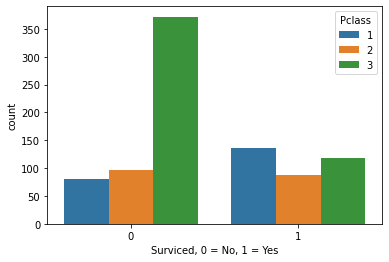

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.countplot(x = "Survived", data=df, hue=df["Pclass"])
plt.xlabel("Surviced, 0 = No, 1 = Yes")
plt.show()

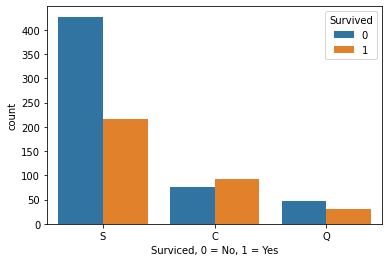

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.countplot(x = "Embarked", data=df, hue=df["Survived"])
plt.xlabel("Surviced, 0 = No, 1 = Yes")
plt.show()

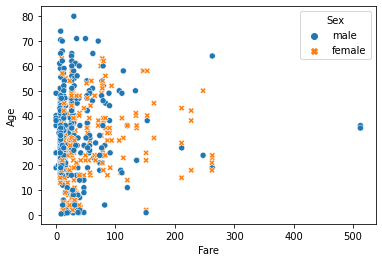

In [ ]:
sns.scatterplot(data = df, x=df["Fare"], y=df["Age"], hue="Sex", style="Sex")

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df["Age"].median()

28.0

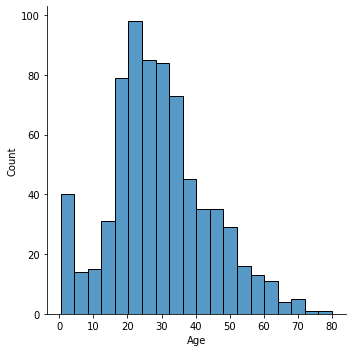

In [ ]:
sns.displot(df["Age"])

In [ ]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

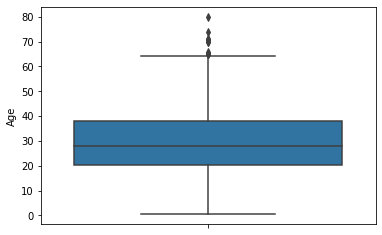

In [ ]:
sns.boxplot(y = df["Age"])

In [ ]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df_test["Age"] = df_test["Age"].fillna(df["Age"].median())
df_test["Fare"] = df["Fare"].fillna(df_test["Fare"].median())

In [ ]:
df_test["Fare"].describe()

count    418.000000
mean      32.521560
std       49.328086
min        0.000000
25%        7.925000
50%       14.454200
75%       30.923950
max      512.329200
Name: Fare, dtype: float64

In [ ]:
def dead(dataframe):
    x = dataframe[dataframe["Survived"] == 0]
    return x

def alive(dataframe):
    x = dataframe[dataframe["Survived"] == 1]
    return x 

In [ ]:
def dead_survived(dataframe_train, dataframe_test):
    x = dataframe_train[dataframe_train["Survived"] == 0]
    y = dataframe_train[dataframe_train["Survived"] == 1]
    x_mean = x["Fare"].mean()
    y_mean = y["Fare"].mean()

    a = dataframe_test[dataframe_test["Survived"] == 0]
    b = dataframe_test[dataframe_test["Survived"] == 1]
    a_mean = a["Fare"].mean()
    b_mean = b["Fare"].mean()

    data = {"Data":["Data_train_dead", "Data_train_survived", "Data_test_dead", "Data_test_survived"],
    "Average Fare": [x_mean, y_mean, a_mean, b_mean]}


    df_survival = pd.DataFrame(data)

    
    return df_survival

In [ ]:
av_fare = dead_survived(df, df_test)
av_fare

,Data,Average Fare
0,Data_train_dead,22.117887
1,Data_train_survived,48.395408
2,Data_test_dead,34.042402
3,Data_test_survived,30.018909


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
group = df.groupby("Embarked")

for i, j in group:
  print(i)
  print(j)

C
     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
1              2         1       1  ...  71.2833   C85         C
9             10         1       2  ...  30.0708   NaN         C
19            20         1       3  ...   7.2250   NaN         C
26            27         0       3  ...   7.2250   NaN         C
30            31         0       1  ...  27.7208   NaN         C
..           ...       ...     ...  ...      ...   ...       ...
866          867         1       2  ...  13.8583   NaN         C
874          875         1       2  ...  24.0000   NaN         C
875          876         1       3  ...   7.2250   NaN         C
879          880         1       1  ...  83.1583   C50         C
889          890         1       1  ...  30.0000  C148         C

[168 rows x 12 columns]
Q
     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
5              6         0       3  ...   8.4583   NaN         Q
16            17         0       3  ...  29.1250   NaN       

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df["Embarked"] = df["Embarked"].fillna("S")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
emb = pd.get_dummies(df["Embarked"])

In [ ]:
sex = pd.get_dummies(df["Sex"])

In [ ]:
df = pd.concat([df, sex], axis=1)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


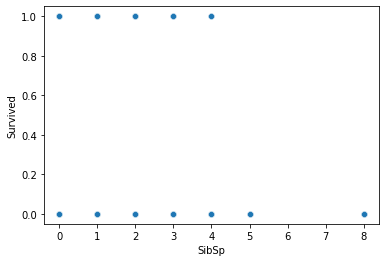

In [ ]:
sns.scatterplot(df["SibSp"], df["Survived"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


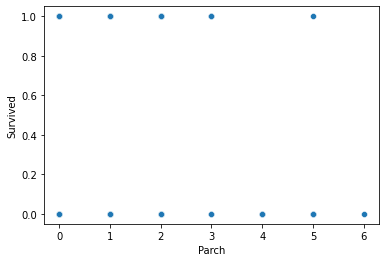

In [ ]:
sns.scatterplot(df["Parch"], df["Survived"])

In [ ]:
df.drop(["Name", "PassengerId", "SibSp", "Parch", "Embarked", "Sex", "Ticket", "Cabin"], axis = 1, inplace=True)

In [ ]:
df

,Survived,Pclass,Age,Fare,C,Q,S,female,male
0,0,3,22.0,7.2500,0,0,1,0,1
1,1,1,38.0,71.2833,1,0,0,1,0
2,1,3,26.0,7.9250,0,0,1,1,0
3,1,1,35.0,53.1000,0,0,1,1,0
4,0,3,35.0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,0,0,1,0,1
887,1,1,19.0,30.0000,0,0,1,1,0
888,0,3,28.0,23.4500,0,0,1,1,0
889,1,1,26.0,30.0000,1,0,0,0,1


## Modelling

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [ ]:
x_train = df.drop("Survived", axis=1)
x_train

,Pclass,Age,Fare,C,Q,S,female,male
0,3,22.0,7.2500,0,0,1,0,1
1,1,38.0,71.2833,1,0,0,1,0
2,3,26.0,7.9250,0,0,1,1,0
3,1,35.0,53.1000,0,0,1,1,0
4,3,35.0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,13.0000,0,0,1,0,1
887,1,19.0,30.0000,0,0,1,1,0
888,3,28.0,23.4500,0,0,1,1,0
889,1,26.0,30.0000,1,0,0,0,1


In [ ]:
x_train_scale = scale.fit_transform(x_train)
x_train_scale

array([[ 0.82737724, -0.56573646, -0.50244517, ...,  0.61583843,
        -0.73769513,  0.73769513],
       [-1.56610693,  0.66386103,  0.78684529, ..., -1.62380254,
         1.35557354, -1.35557354],
       [ 0.82737724, -0.25833709, -0.48885426, ...,  0.61583843,
         1.35557354, -1.35557354],
       ...,
       [ 0.82737724, -0.1046374 , -0.17626324, ...,  0.61583843,
         1.35557354, -1.35557354],
       [-1.56610693, -0.25833709, -0.04438104, ..., -1.62380254,
        -0.73769513,  0.73769513],
       [ 0.82737724,  0.20276197, -0.49237783, ..., -1.62380254,
        -0.73769513,  0.73769513]])

In [ ]:
y_train = df["Survived"].values
y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train_scale, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Test Set 

In [ ]:
df_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.2500,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,71.2833,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,7.9250,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,53.1000,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,0.0000,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,7.9250,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,8.0500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,32.5000,NaN,S


In [ ]:
df_test["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
df_test.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_test["Embarked"] = df_test["Embarked"].fillna("S")

In [ ]:
emb_test = pd.get_dummies(df_test["Embarked"])
emb_test

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [ ]:
sex_test = pd.get_dummies(df_test["Sex"])
sex_test

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [ ]:
df_test.drop(["PassengerId", "SibSp", "Parch", "Embarked", "Sex"], axis = 1, inplace=True)

In [ ]:
df_test = pd.concat([df_test, sex_test], axis=1)
df_test

,Survived,Pclass,Age,Fare,C,Q,S,female,male
0,0,3,34.500000,7.2500,0,1,0,0,1
1,1,3,47.000000,71.2833,0,0,1,1,0
2,0,2,62.000000,7.9250,0,1,0,0,1
3,0,3,27.000000,53.1000,0,0,1,0,1
4,1,3,22.000000,8.0500,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
413,0,3,29.699118,0.0000,0,0,1,0,1
414,1,1,39.000000,7.9250,1,0,0,1,0
415,0,3,38.500000,8.0500,0,0,1,0,1
416,0,3,29.699118,32.5000,0,0,1,0,1


In [ ]:
x_test = df_test.drop("Survived", axis = 1)
x_test_scale = scale.fit_transform(x_test)
x_test_scale

array([[ 8.73481905e-01,  3.44284172e-01, -5.12929762e-01, ...,
        -1.35067551e+00, -7.55928946e-01,  7.55928946e-01],
       [ 8.73481905e-01,  1.33465451e+00,  7.86736157e-01, ...,
         7.40370278e-01,  1.32287566e+00, -1.32287566e+00],
       [-3.15819190e-01,  2.52309891e+00, -4.99229476e-01, ...,
        -1.35067551e+00, -7.55928946e-01,  7.55928946e-01],
       ...,
       [ 8.73481905e-01,  6.61202680e-01, -4.96692386e-01, ...,
         7.40370278e-01, -7.55928946e-01,  7.55928946e-01],
       [ 8.73481905e-01, -3.60879467e-02, -4.37598240e-04, ...,
         7.40370278e-01, -7.55928946e-01,  7.55928946e-01],
       [ 8.73481905e-01, -3.60879467e-02, -3.96223626e-01, ...,
        -1.35067551e+00, -7.55928946e-01,  7.55928946e-01]])

In [ ]:
y_test = df_test["Survived"].values
y_test

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
y_pred = model.predict(x_test_scale)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7751196172248804

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

In [ ]:
model_rf.fit(x_train_scale, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = model_rf.predict(x_test_scale)

In [ ]:
accuracy_score(y_test, y_pred)

0.7655502392344498

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       260
           1       0.71      0.63      0.67       158

    accuracy                           0.77       418
   macro avg       0.75      0.74      0.74       418
weighted avg       0.76      0.77      0.76       418



In [ ]:
from sklearn.svm import SVC
model_svm = SVC()

In [ ]:
model_svm.fit(x_train_scale, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = model_svm.predict(x_test_scale)

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)